# Earth Observation for Monitoring Agricultural land in Colombia

This notebook introduces the datasets and suggests a number of interesting projects you can use as a starting point for the group work.

## Getting Started
1. Either install the python dependencies manually or setup a new conda environment, using the 'medellin.yml' file in the root of this repository (https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#creating-an-environment-from-an-environment-yml-file). You may also wish to install QGIS 3 (https://qgis.org/en/site/forusers/download.html) however this is not essential.

2. Download the pre-processed Sentinel 2 data ('cali_training.nc) for this project from https://drive.google.com/file/d/1oSitiedyaYiaElcTfFhvJHUSjJYQQxNU/view?usp=sharing and move to the 'geo_data' directory.

3. Run this workbook to check the packages are all behaving as expected

In [1]:
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import xarray
import datetime

# read in the sentinel 2 data
s2_data = xarray.open_dataset('geo_data/cali_training.nc')
# make a list of dates
dates = [str(x.values)[:10] for x in s2_data.date]
dates

['2016-12-18',
 '2017-02-16',
 '2017-04-27',
 '2017-06-06',
 '2017-07-16',
 '2017-12-18',
 '2018-01-07',
 '2018-02-26',
 '2018-04-07',
 '2018-06-21',
 '2018-07-01',
 '2018-07-11',
 '2018-07-16',
 '2018-07-26',
 '2018-08-20',
 '2018-09-19',
 '2018-09-29',
 '2018-10-04',
 '2018-10-14',
 '2018-12-03',
 '2018-12-18',
 '2018-12-28',
 '2019-01-02',
 '2019-01-12',
 '2019-01-17',
 '2019-01-22']

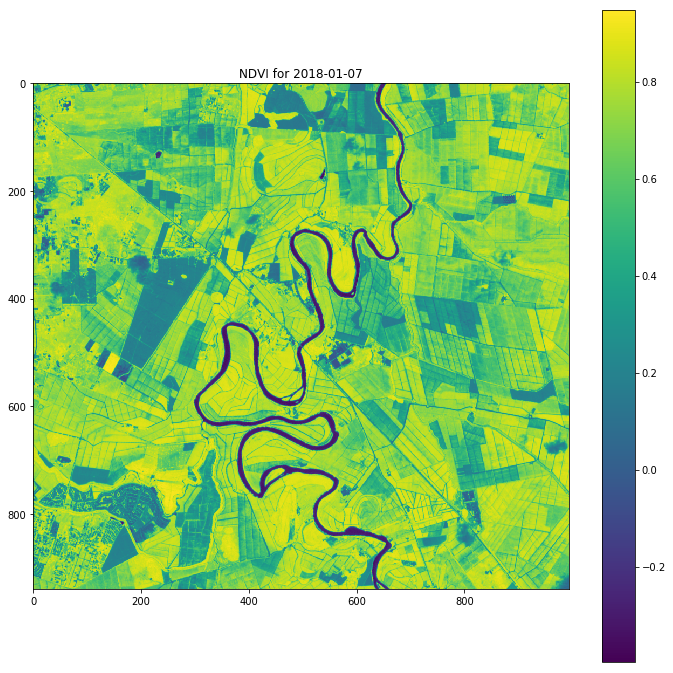

In [2]:
def NDVI(reflectance_array):
    """ takes an xarray.DataArray object with the a 'band' coordinate dimension
    and returns an xarray.DataArray of NDVI values"""
    # be careful when calculating indices using the integer arrays
    # usually representing raster data. Explicitly convert to floats
    # for division.
    r = np.array(reflectance_array.sel(band='B04'),dtype='float')
    ir = np.array(reflectance_array.sel(band='B08'),dtype='float')
    return xarray.DataArray((ir-r)/(ir+r))

# choose a date index:
d_idx = 6

plt.figure(figsize =(12,12))
plt.title('NDVI for {}'.format(dates[d_idx]))
plt.imshow(NDVI(s2_data.reflectance.isel(date=d_idx)),cmap='viridis')
plt.colorbar()
plt.show()